In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix

In [3]:
# Step 2: Load data from CSV
df = pd.read_csv("C:/Users/VINCENT/Desktop/NIS/construction.csv")

In [102]:
# Step 3: Clean negative entries (convert them to positive)
df=df.abs()

# verify that all values are now positive
df.head()

,Delay time,Estimated Surface (sq m),Estimated Height (m),Floors,Num of Workers,Bad Weather Factor (%),Design Variation Factor (%),Material Factor (%),Gov Regulation Factor (%),Site Condition Factor (%)
0,6,1589,19,4,32,0.24,0.32,0.01,0.85,0.64
1,489,1334,14,2,19,0.24,0.24,0.70,0.88,0.85
2,29,1273,10,2,68,0.24,0.40,0.04,0.04,0.14
3,134,866,25,2,67,0.24,0.16,0.00,0.61,0.31
4,143,444,8,1,118,0.24,0.40,0.01,0.45,0.32


In [103]:
# Step 4: Descriptive analysis and plotting
# get basic statistics of the dataset
df.describe()

,Delay time,Estimated Surface (sq m),Estimated Height (m),Floors,Num of Workers,Bad Weather Factor (%),Design Variation Factor (%),Material Factor (%),Gov Regulation Factor (%),Site Condition Factor (%)
count,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000
mean,78.245681,1498.057582,17.558267,3.551412,80.338086,0.314033,0.324014,0.042364,0.500359,0.293408
std,60.560057,869.437443,7.357372,1.694115,40.384304,0.134199,0.141803,0.056127,0.286440,0.198633
min,0.000000,20.000000,5.000000,1.000000,10.000000,0.160000,0.080000,0.000000,0.000000,0.000000
25%,15.000000,755.500000,11.000000,2.000000,46.000000,0.240000,0.240000,0.020000,0.250000,0.130000
50%,88.000000,1465.000000,18.000000,4.000000,81.000000,0.320000,0.320000,0.030000,0.500000,0.290000
75%,137.000000,2259.000000,24.000000,5.000000,116.000000,0.400000,0.400000,0.050000,0.750000,0.320000
max,639.000000,3000.000000,30.000000,6.000000,150.000000,0.920000,1.000000,1.260000,1.000000,1.000000


In [110]:
# Step 5: Regression analysis
X = df.drop(columns=["Delay time"])
y = df["Delay time"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()


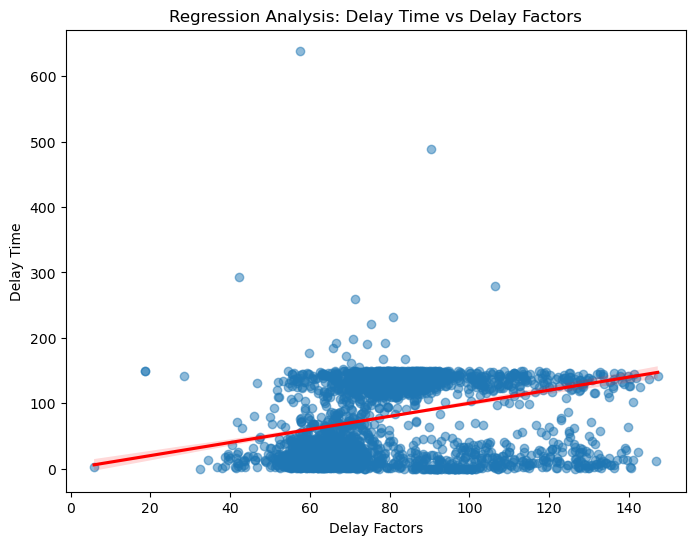

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Delay time   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     40.28
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           4.68e-69
Time:                        13:28:08   Log-Likelihood:                -19967.
No. Observations:                3647   AIC:                         3.995e+04
Df Residuals:                    3637   BIC:                         4.002e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          70.8317      5.554     12.753      0.000      59.942      81.721
Estimated Surface (sq m)       -0.0026      0.001     -2.365      0.018      -0.005      -0.000
Estimated Height (m)           -0.2319      0.130     -1.780      0.075      -0.487       0.024
Floors                          0.2016      0.566      0.356      0.722      -0.908       1.311
Num of Workers                 -0.0012      0.024     -0.049      0.961      -0.048       0.045
Bad Weather Factor (%)        -36.6565      7.201     -5.091      0.000     -50.775     -22.538
Design Variation Factor (%)    16.8449      6.792      2.480      0.013       3.529      30.161
Material Factor (%)           -53.7609     17.140     -3.137      0.002     -87.365     -20.157
Gov Regulation Factor (%)      -2.3782      3.349     -0.710      0.478      -8.944       4.188
Site Condition Factor (%)      82.7878      4.833     17.128      0.000      73.311      92.264
==============================================================================
Omnibus:                      208.570   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.092
Skew:                           0.188   Prob(JB):                    1.76e-159
Kurtosis:                       5.161   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
# plot regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=model.fittedvalues, y=y, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Delay Factors")
plt.ylabel("Delay Time")
plt.title("Regression Analysis: Delay Time vs Delay Factors")
plt.show()
model.summary()


Model Evaluation:
Mean Absolute Error: 51.49646465663297 
R-squared: 0.07813570563657235 
Mean Squared Error: 3183.2616586935433
Root Mean Squared Error: 56.420401085897495 
Model Coeficient: [-1.95556542e-03 -1.65920241e-01  1.75432311e-01 -4.68994617e-03
 -4.05950909e+01  1.23475774e+01 -4.33570451e+01 -1.32623071e+00
  8.65900100e+01] 
Model Inter: 70.03975338845261


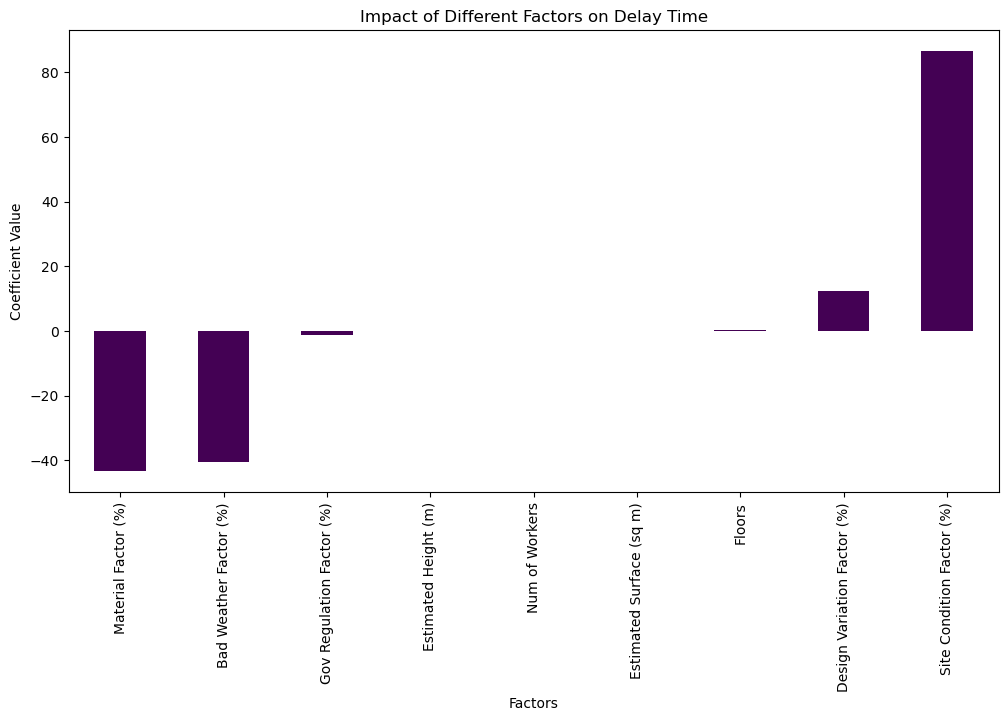

In [6]:
# Step 6: Predict delay time using regression 
X = df.drop(columns=["Delay time"])
y = df["Delay time"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print('\nModel Evaluation:')
print('Mean Absolute Error:', mae, '\nR-squared:', r2, '\nMean Squared Error:', mse)
print('Root Mean Squared Error:', rmse, '\nModel Coeficient:', model.coef_, '\nModel Inter:', model.intercept_)

# Plot feature importance based on regression coefficients
plt.figure(figsize=(12, 6))
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values().plot(kind="bar", colormap="viridis")
plt.xlabel("Factors")
plt.ylabel("Coefficient Value")
plt.title("Impact of Different Factors on Delay Time")
plt.show()

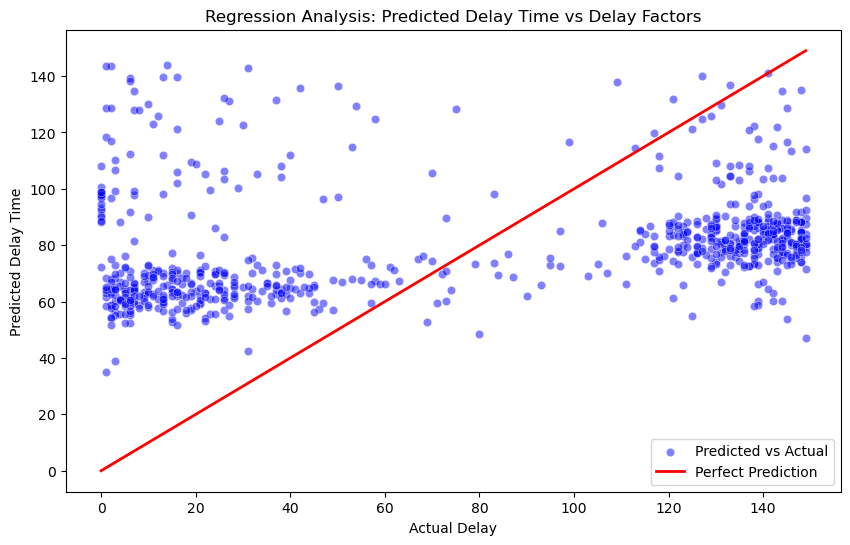

In [109]:
# Plot the relationship between actual and predicted delay times
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, label="Predicted vs Actual", color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2, label="Perfect Prediction")
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay Time")
plt.title("Regression Analysis: Predicted Delay Time vs Delay Factors")
plt.legend()
plt.show()

In [7]:
# Output all predicted delay time values
print("\nPredicted 'Delay time' values on the test set:")
for i, pred in enumerate(y_pred, 1):
    print(f"{i}: {pred}")


Predicted 'Delay time' values on the test set:
1: 61.72575459715394
2: 56.273387514161314
3: 138.12562778367285
4: 59.054573756138296
5: 62.701258654939544
6: 60.105777936559775
7: 64.93766664160401
8: 54.82063861493019
9: 55.13350668239431
10: 90.50286147389957
11: 103.85825508363843
12: 94.72290594837796
13: 81.20714949770557
14: 66.74528206915836
15: 71.11000110693138
16: 64.2088712110415
17: 78.91276710382857
18: 69.86594937970375
19: 66.70089625275992
20: 58.93067313719058
21: 72.25818419280314
22: 57.03345885850354
23: 65.20012054827775
24: 55.18965043233139
25: 74.30210828484086
26: 67.2665070237779
27: 64.36573480360835
28: 86.13052606710669
29: 80.34692301685526
30: 124.845960134671
31: 63.92495054412849
32: 76.11118026076791
33: 71.5841991259079
34: 78.90220481251609
35: 62.11000113580739
36: 42.42790626796517
37: 70.35134338246678
38: 80.99870644116339
39: 63.22217733018352
40: 64.36521166343988
41: 67.1684636916988
42: 61.17510038659393
43: 72.22342482876579
44: 81.9125613